# Problem Statement
One of the prestigious telecom company maintains a database of the customer and their details. Based on this dataset the requirememt is to create the classification model using Naive Bayes to predict if the customer will churn or not. There are around 7000+ records using this we need to create the model after breaking the data into test and train.

**Dataset** : Telco_Customer_Churn.scr

**Developer** : Saurav Bhagat

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [111]:
data = pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,No phone service,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,Yes


In [112]:
data.shape

(7043, 21)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


In [114]:
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

# Exploratory Data Analysis

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Figure size 1500x200 with 0 Axes>

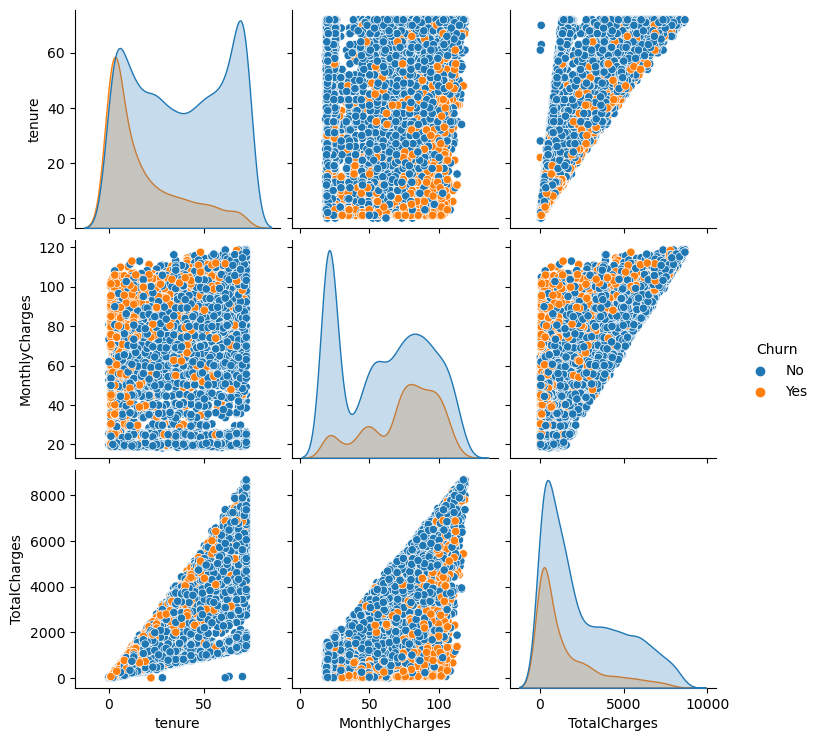

In [115]:
plt.figure(figsize=(15,2))
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']], hue = 'Churn')
plt.show()

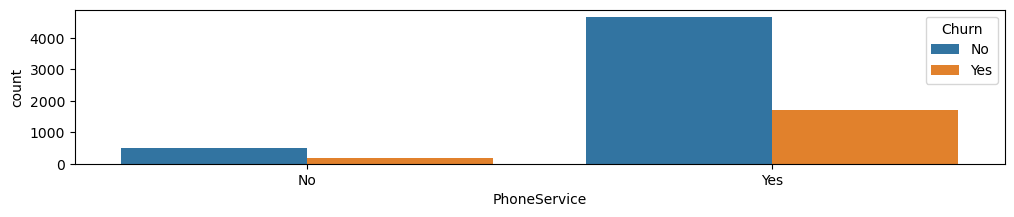

In [116]:
plt.figure(figsize = (12,2))
sns.countplot(data = data, x = 'PhoneService', hue = 'Churn')
plt.show()

Still we cant tell that phoneservice is an important variable

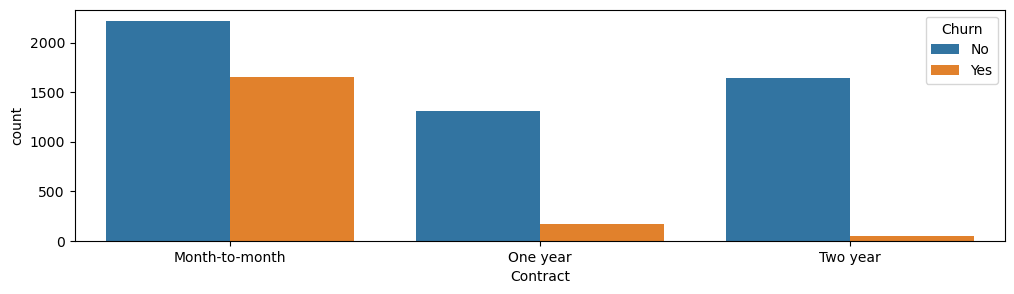

In [117]:
plt.figure(figsize = (12,3))
sns.countplot(data = data , x= 'Contract', hue = 'Churn')
plt.show()

from above graph we can say that customer with month-to-month contract tend to churn more and customer with two year contract are less tend to churn

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

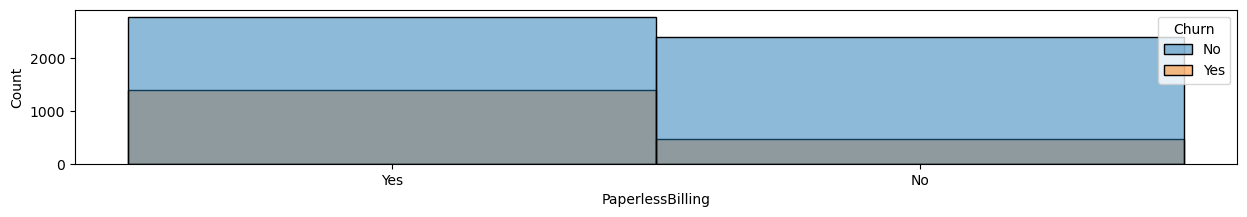

In [118]:
plt.figure(figsize=(15,2))
sns.histplot(data=data, x = 'PaperlessBilling',hue='Churn')
plt.show()

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

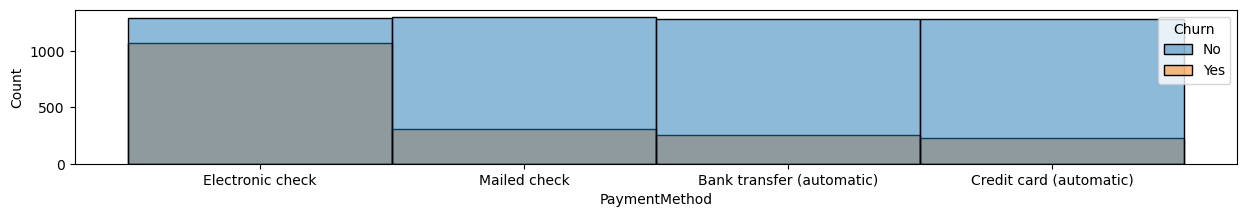

In [119]:
plt.figure(figsize=(15,2))
sns.histplot(data=data, x = 'PaymentMethod',hue='Churn')
plt.show()

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

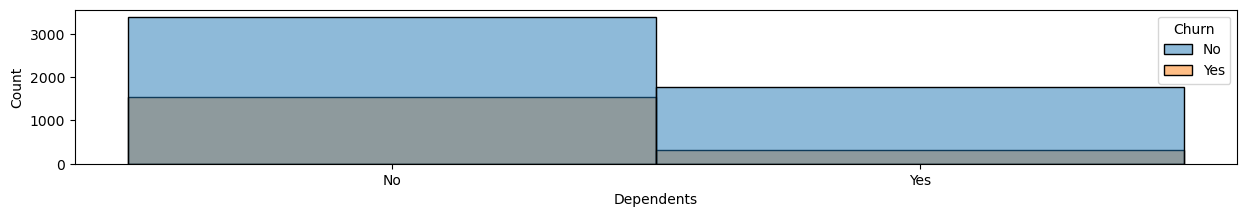

In [120]:
plt.figure(figsize=(15,2))
sns.histplot(data=data, x = 'Dependents',hue='Churn')
plt.show()

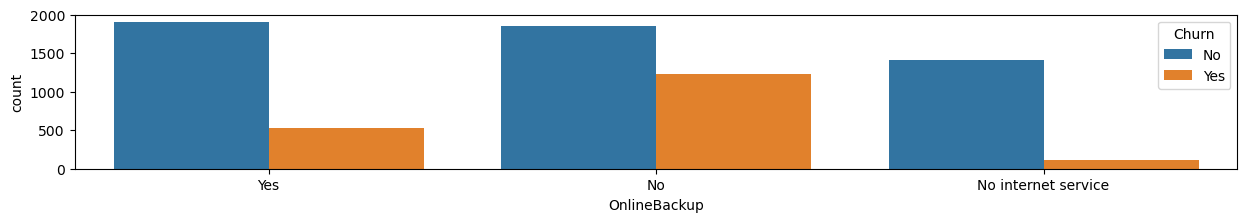

In [121]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x = 'OnlineBackup',hue='Churn')
plt.show()

C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\saura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

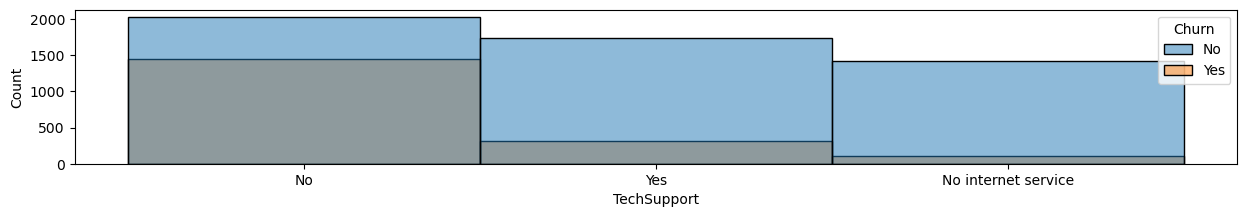

In [122]:
plt.figure(figsize=(15,2))
sns.histplot(data=data, x = 'TechSupport',hue='Churn')
plt.show()

# Missing Value Treatment

In [123]:
data.isnull().sum()/len(data)*100

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Churn               0.0
dtype: float64

# Encoding and Feture Scaling

In [124]:
def data_type(data):
    
    numerical=[]
    categorical = []
    
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            numerical.append(col)
        else:
            categorical.append(col)
    return numerical, categorical

numerical, categorical = data_type(data)
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [125]:
def binary_type(data):
    
    binary =[]
    
    for col in data.select_dtypes(include = ['int', 'float']).columns:
        unique = data[col].unique()
        if np.in1d(unique, [0,1]).all():
            binary.append(col)
    return binary

binary = binary_type(data)
binary
        

['SeniorCitizen']

In [126]:
numerical = [i for i in numerical if i not in binary]
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [127]:
from sklearn.preprocessing import StandardScaler

def encoding(categorical, data):
    
    for i in categorical:
        data[i] = data[i].astype('category')
        data[i] = data[i].cat.codes
    return data

data = encoding(categorical, data)

def scaling(numerical, data):
    
    sc = StandardScaler()
    for i in numerical:
        data[numerical] = sc.fit_transform(data[numerical])
    return data

data = scaling(numerical, data)

In [128]:
data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,5375,-1.277445,0,0,1,2,-1.160323,-0.991720,0,0,...,0,1,0,0,2,0,0,0,0,0
1,3962,0.066327,1,1,0,3,-0.259629,-0.171275,1,0,...,0,0,0,2,0,2,0,0,0,0
2,2564,-1.236724,1,0,1,3,-0.362660,-0.957176,1,0,...,0,0,0,2,2,0,0,0,0,1
3,5535,0.514251,0,1,0,0,-0.746535,-0.192782,1,0,...,0,1,0,2,0,2,2,0,0,0
4,6511,-1.236724,1,0,1,2,0.197365,-0.937984,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,-0.340876,1,1,1,3,0.665992,-0.126715,1,0,...,1,2,0,2,0,2,2,2,2,0
7039,1525,1.613701,1,1,1,1,1.277533,2.243495,0,0,...,1,2,1,0,2,2,0,2,2,0
7040,3367,-0.870241,0,0,1,2,-1.168632,-0.852042,0,0,...,1,1,0,2,0,0,0,0,0,0
7041,5934,-1.155283,1,0,1,3,0.320338,-0.869623,1,1,...,0,2,1,0,0,0,0,0,0,1


In [129]:
len(data.columns)

21

# Data Split

In [130]:
x = data.iloc[:, 0:20].values   #return numpy arrays 
y = data.iloc[:, -1].values

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.3, random_state = 42, stratify = y)

In [132]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.734686
1    0.265314
Name: proportion, dtype: float64
0    0.734501
1    0.265499
Name: proportion, dtype: float64


# Model Training

In [133]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

# Model Evaluation

In [134]:
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [135]:
score_report = classification_report(y_test, y_pred)
print(score_report)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1552
           1       0.51      0.74      0.61       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113



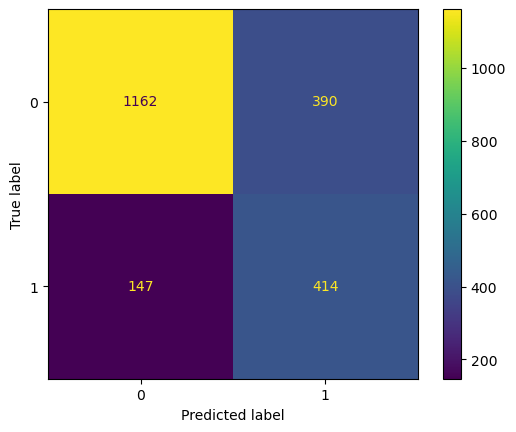

In [136]:
# Confusion Matrix
y_test_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred, labels = model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
plt.plot()

In [137]:
#Comparing the Training and Testing Accuracies

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.7569979716024341
0.7458589682915286


**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model